In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/mdnaif/Desktop/Winter_Arc_ML/Day05_ClassificationModelComparisson/heart_cleveland_upload.csv")

In [3]:
print("Size : ",df.size)
print("Shape : ",df.shape)

Size :  4158
Shape :  (297, 14)


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [9]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

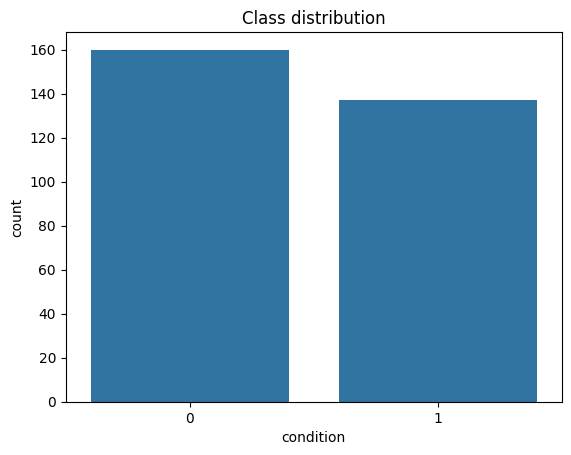

In [12]:
sns.countplot(x= df["condition"],data = df)
plt.title("Class distribution")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

cat_coln = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]
num_coln =["age","trestbps","chol","thalach","oldpeak"]

X = df[cat_coln + num_coln]
y = df["condition"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

preprocessing = ColumnTransformer([
    ("cat_col",OneHotEncoder(handle_unknown="ignore"),cat_coln),
    ("num_col","passthrough",num_coln)
])

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models = {
    
    "Logistic Regression" : make_pipeline(
        preprocessing,
        StandardScaler(with_mean=False),
        LogisticRegression(max_iter=3000)
    ),
    
    "KNeighboursClassifier" : make_pipeline(
        preprocessing,
        StandardScaler(with_mean=False),
        KNeighborsClassifier(n_neighbors=5)
    ),
    
    "SVM" : make_pipeline(
        preprocessing,
        StandardScaler(with_mean=False),
        SVC()
    ),
    
    "Naive Bayes" :make_pipeline(
        preprocessing,
        GaussianNB()
    ),
    
    "Decision Tree" : make_pipeline(
        preprocessing,
        DecisionTreeClassifier(random_state=42)
    ),
    
    "Random Forest" : make_pipeline(
        preprocessing,
        RandomForestClassifier(random_state=42,oob_score=True)
    )
    
}

In [16]:
for name,pipe in models.items():
    print(f"\n{name} pipeline steps : ")
    print(pipe.named_steps)


Logistic Regression pipeline steps : 
{'columntransformer': ColumnTransformer(transformers=[('cat_col',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'ca', 'thal']),
                                ('num_col', 'passthrough',
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak'])]), 'standardscaler': StandardScaler(with_mean=False), 'logisticregression': LogisticRegression(max_iter=3000)}

KNeighboursClassifier pipeline steps : 
{'columntransformer': ColumnTransformer(transformers=[('cat_col',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'ca', 'thal']),
                                ('num_col', 'passthrough',
                             

In [17]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    
    "Logistic Regression" : [
    # l2 penalty
    {"logisticregression__penalty": ["l2"],
     "logisticregression__solver": ["lbfgs", "liblinear"],
     "logisticregression__C": [0.01, 0.1, 1, 10, 100]},
    
    # l1 penalty
    {"logisticregression__penalty": ["l1"],
     "logisticregression__solver": ["liblinear", "saga"],
     "logisticregression__C": [0.01, 0.1, 1, 10, 100]},
    ],
    
    "KNeighboursClassifier" : {
        "kneighborsclassifier__n_neighbors" : list(range(3,39)),
        "kneighborsclassifier__weights" : ["uniform","distance"],
        "kneighborsclassifier__p" : [1,2],
        "kneighborsclassifier__metric" : ["minkowski","euclidean","manhattan"] 
    },
    
    "SVM" : {
        "svc__C": [0.1, 1, 10, 100],
        "svc__kernel": ["linear", "rbf"],
        "svc__gamma": ["scale", "auto"]
    },
    
    "Naive Bayes" : {
        "gaussiannb__var_smoothing": np.logspace(0,-9,  num=100)
    },
    
    "Decision Tree" : {
    "decisiontreeclassifier__max_depth" : [3,4,5,6,7,8],
    "decisiontreeclassifier__min_samples_leaf" : [5,10,15,20],
    "decisiontreeclassifier__class_weight" : ["balanced",None],
    },
    
    "Random Forest" : {
        "randomforestclassifier__n_estimators": [100, 150, 200],
        "randomforestclassifier__max_depth": [3, 4, 5, 6, 7, None],
        "randomforestclassifier__max_features": ["sqrt", "log2"],
        "randomforestclassifier__min_samples_leaf": [1, 2, 4],
        "randomforestclassifier__bootstrap": [True], 
        "randomforestclassifier__max_samples": [0.7, 0.8, None],
        "randomforestclassifier__criterion": ["gini", "entropy"]
    }
}


results = {}  

for name in models:
    print(f"\nRandomized Search for {name} -> ")

    model_params = param_dist[name]

    grid = RandomizedSearchCV(
        estimator=models[name],
        param_distributions=model_params,
        n_iter=20,
        scoring="f1",
        cv=5,
        n_jobs=-1,
        random_state=42
    )

    grid.fit(X_train, y_train)  
    results[name] = grid     

    print(f"Best params for {name}:", grid.best_params_)


Randomized Search for Logistic Regression -> 
Best params for Logistic Regression: {'logisticregression__solver': 'lbfgs', 'logisticregression__penalty': 'l2', 'logisticregression__C': 0.01}

Randomized Search for KNeighboursClassifier -> 
Best params for KNeighboursClassifier: {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__p': 2, 'kneighborsclassifier__n_neighbors': 16, 'kneighborsclassifier__metric': 'euclidean'}

Randomized Search for SVM -> 


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for SVM: {'svc__kernel': 'rbf', 'svc__gamma': 'auto', 'svc__C': 10}

Randomized Search for Naive Bayes -> 
Best params for Naive Bayes: {'gaussiannb__var_smoothing': np.float64(1.5199110829529332e-05)}

Randomized Search for Decision Tree -> 
Best params for Decision Tree: {'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__class_weight': None}

Randomized Search for Random Forest -> 
Best params for Random Forest: {'randomforestclassifier__n_estimators': 150, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_samples': 0.7, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 7, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__bootstrap': True}


In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

for name, grid in results.items():
    print(f"\n===== {name} =====")
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



===== Logistic Regression =====
Accuracy: 0.9
Confusion Matrix:
 [[32  0]
 [ 6 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60


===== KNeighboursClassifier =====
Accuracy: 0.8833
Confusion Matrix:
 [[32  0]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.75      0.86        28

    accuracy                           0.88        60
   macro avg       0.91      0.88      0.88        60
weighted avg       0.90      0.88      0.88        60


===== SVM =====
Accuracy: 0.9167
Confusion Matrix:
 [[32  0]
 [ 5 23]]
Classification Report:
               precision    

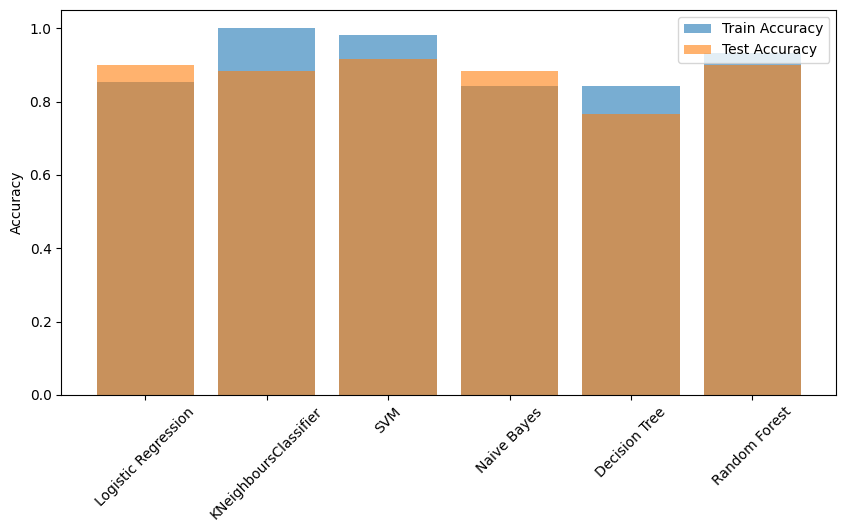

In [19]:
train_acc_list = []
test_acc_list = []
model_names = []

for name, grid in results.items():
    best_model = grid.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    train_acc_list.append(accuracy_score(y_train, y_train_pred))
    test_acc_list.append(accuracy_score(y_test, y_test_pred))
    model_names.append(name)

plt.figure(figsize=(10,5))
plt.bar(model_names, train_acc_list, alpha=0.6, label="Train Accuracy")
plt.bar(model_names, test_acc_list, alpha=0.6, label="Test Accuracy")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.legend()
plt.show()